# Iron Condor

주가가 많이 움직일 것 같지 않은 경우의 전략. 제한된 risk 와 제한된 작은 profit 목적. 2 개의 put 과 2 개의 call, 4 개의 행사가로 구성.

목적은 주식의 낮은 변동성에서 이익을 얻는 것. 즉, 만기일에 주가가 중간 행사가에서 끝나면 전략 성공.

* 같은 만기일의 4 개의 다른 행사가로 구성

    - Bull put spread
        1. Buy a 240 strike put for 0.8
        2. Sell a 250 strike put for 2.8
    - Bear call spread
        1. Sell a 260 strike call for 2.4
        2. Buy a 270 strike call for 0.8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import korean

In [2]:
def put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    """
    풋옵션의 손익(PnL)을 계산하는 함수
    
    Parameters:
    sT : 만기 시점의 기초 자산 가격 (stock price at expiration)
    strike_price : 풋옵션의 행사가 (strike price)
    premium : 옵션을 매수할 때 지불한 프리미엄 
    contracts : 계약 수 (옵션의 계약 수)
    multiplier : 옵션의 배수 (옵션 계약 당 몇 주를 포함하는지 예: 주식 옵션의 경우 100주)
    
    Returns: 각 기초 자산 가격에서의 손익 (Profit and Loss)
    """
    # 주가가 행사가보다 낮으면, 행사가에서 주가를 뺀 값이 손익(pnl), 아니면 0
    pnl = np.where(sT < strike_price, strike_price - sT, 0) - premium
    # 계약 수와 배수를 곱해 총 손익을 반환
    return pnl * contracts * multiplier


def call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    """
    콜옵션의 손익(PnL)을 계산하는 함수
    
    Parameters:
    sT : 만기 시점의 기초 자산 가격 (stock price at expiration)
    strike_price : 콜옵션의 행사가 (strike price)
    premium : 옵션을 매수할 때 지불한 프리미엄 
    contracts : 계약 수 (옵션의 계약 수)
    multiplier : 옵션의 배수 (옵션 계약 당 몇 주를 포함하는지 예: 주식 옵션의 경우 100주)
    
    Returns: 각 기초 자산 가격에서의 손익 (Profit and Loss)
    """
    # 주가가 행사가보다 높으면, 주가에서 행사가를 뺀 값이 손익(pnl), 아니면 0
    pnl = np.where(sT > strike_price, sT - strike_price, 0) - premium
    # 계약 수와 배수를 곱해 총 손익을 반환
    return pnl * contracts * multiplier

In [3]:
# 현물 가격
spot_price = 255

# 콜옵션 만기 시 주가 범위
sT = np.arange(0.9*spot_price,1.1*spot_price,1) 
sT

array([229.5, 230.5, 231.5, 232.5, 233.5, 234.5, 235.5, 236.5, 237.5,
       238.5, 239.5, 240.5, 241.5, 242.5, 243.5, 244.5, 245.5, 246.5,
       247.5, 248.5, 249.5, 250.5, 251.5, 252.5, 253.5, 254.5, 255.5,
       256.5, 257.5, 258.5, 259.5, 260.5, 261.5, 262.5, 263.5, 264.5,
       265.5, 266.5, 267.5, 268.5, 269.5, 270.5, 271.5, 272.5, 273.5,
       274.5, 275.5, 276.5, 277.5, 278.5, 279.5])

## Bull Put Spread

- 주식이 소폭 상승하거나 하락하지 않을 것으로 예상될 때 사용하는 옵션 전략
- 주가가 크게 상승하지 않아도 일정 수준 이상에서 유지되면 전략이 성공  
- put option 을 사고 동시에 더 높은 행사가의 put option 을 파는 전략. 주가의 작은 상승에서 이익을 얻는 것. 만기일 주가가 높은 행사가 이상으로 오르면 전략 성공.

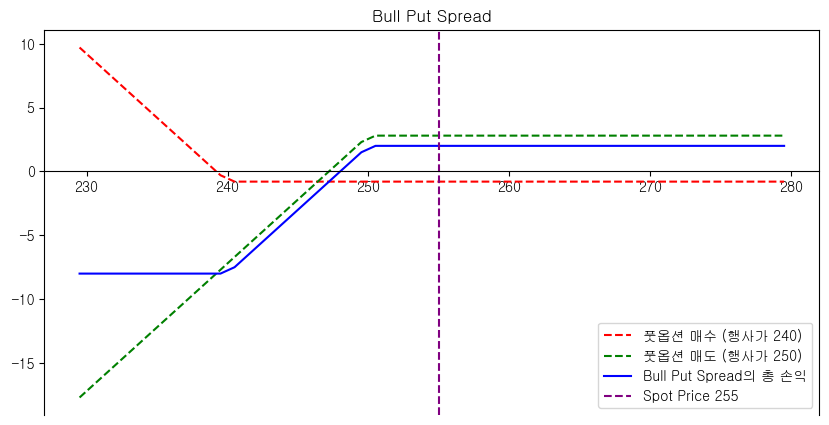

In [4]:
# 풋옵션 매수 (Long Put)
strike_price_long_put = 240  # 행사가 240인 풋옵션 매수
premium_long_put = 0.8  # 풋옵션 매수 시 지불한 프리미엄

# 더 높은 행사가의 풋옵션 매도 (Short Put)
strike_price_short_put = 250  # 행사가 250인 풋옵션 매도
premium_short_put = 2.8  # 풋옵션 매도 시 받은 프리미엄

# 풋옵션 매수의 손익 계산
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

# 풋옵션 매도의 손익 계산 (매도이므로 -1을 곱함)
payoff_short_put = -1 * put_payoff(sT, strike_price_short_put, premium_short_put)

# Bull Put Spread의 손익 계산 (매수 포지션과 매도 포지션 손익 합)
payoff_bull_put_spread = payoff_long_put + payoff_short_put

# 손익 그래프 그리기
fig, ax = plt.subplots()
# x축(주가)이 그래프 중간에 위치하도록 설정
ax.spines['bottom'].set_position('zero')

# 각 포지션의 손익을 그래프로 표현
ax.plot(sT, payoff_long_put, 'r--', label='풋옵션 매수 (행사가 240)')   
ax.plot(sT, payoff_short_put, 'g--', label='풋옵션 매도 (행사가 250)')  
ax.plot(sT, payoff_bull_put_spread, 'b-', label='Bull Put Spread의 총 손익')  

# 현물 가격 표시
ax.axvline(x=spot_price, color='purple', linestyle='--', label=f'Spot Price {spot_price}')

plt.legend(loc=4)
plt.title('Bull Put Spread')
plt.show()

# Bear Call Spread
- 주가가 하락하거나 크게 상승하지 않을 것으로 예상될 때 사용하는 옵션 전략
- 주가가 크게 상승하지 않으면 수익을 얻는 방식  
- 콜옵션을 매수하고 동시에 더 낮은 행사가의 콜옵션을 매도. 전략의 목표는 주가의 작은 하락에서 이익을 얻는 것. 만기일 주가가 낮은 행사가 이하로 내리면 전략 성공.

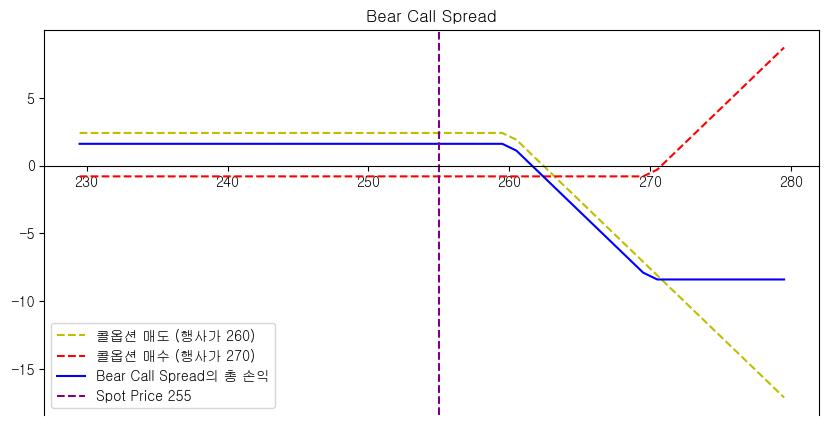

In [5]:
# 콜옵션 매도 (Short Call)
strike_price_short_call = 260  # 행사가 260인 콜옵션 매도
premium_short_call = 2.4  # 콜옵션 매도 시 받은 프리미엄

# 더 높은 행사가의 콜옵션 매수 (Long Call)
strike_price_long_call = 270  # 행사가 270인 콜옵션 매수
premium_long_call = 0.8  # 콜옵션 매수 시 지불한 프리미엄

# 콜옵션 매도의 손익 계산 (매도이므로 -1을 곱함)
payoff_short_call = -1 * call_payoff(sT, strike_price_short_call, premium_short_call)

# 콜옵션 매수의 손익 계산
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)

# Bear Call Spread의 손익 계산 (매도 포지션과 매수 포지션 손익 합)
payoff_bear_call_spread = payoff_short_call + payoff_long_call

# 손익 그래프 그리기
fig, ax = plt.subplots()
# x축(주가)이 그래프 중간에 위치하도록 설정
ax.spines['bottom'].set_position('zero')

# 각 포지션의 손익을 그래프로 표현
ax.plot(sT, payoff_short_call, 'y--', label='콜옵션 매도 (행사가 260)')  
ax.plot(sT, payoff_long_call, 'r--', label='콜옵션 매수 (행사가 270)')  
ax.plot(sT, payoff_bear_call_spread, 'b-', label='Bear Call Spread의 총 손익')  

# 현물 가격 표시
ax.axvline(x=spot_price, color='purple', linestyle='--', label=f'Spot Price {spot_price}')

plt.legend(loc=3)
plt.title('Bear Call Spread')
plt.show()

## Iron Condor

주가가 큰 변동 없이 일정 범위에서 유지될 것으로 예상될 때 사용하는 중립적 옵션 전략입니다. 이 전략은 주가가 많이 오르거나 내리지 않고 횡보할 것으로 기대할 때 수익을 극대화할 수 있으며, 변동성이 낮은 시장에서 특히 효과적입니다.  

Iron Condor 전략은 4개의 옵션 포지션으로 구성된 복합 전략입니다. 콜옵션과 풋옵션을 사용하여 서로 다른 행사가에서 매도 및 매수 포지션을 동시에 취합니다.

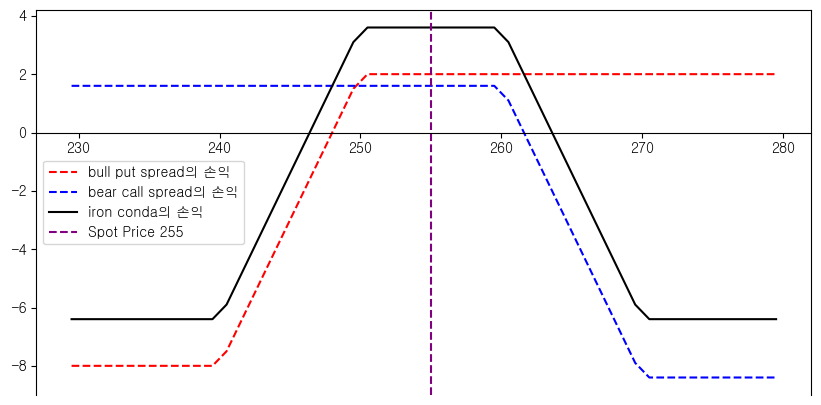

In [6]:
# Iron Condor 전략의 손익 계산 (Bull Put Spread + Bear Call Spread)
payoff_iron_conda = payoff_bull_put_spread + payoff_bear_call_spread

# 손익 그래프 그리기
fig, ax = plt.subplots()
# x축(주가)이 그래프 중간에 위치하도록 설정
ax.spines['bottom'].set_position('zero')

# Bull Put Spread의 손익을 빨간색 점선으로 그래프에 표시
ax.plot(sT, payoff_bull_put_spread, 'r--', label='bull put spread의 손익')

# Bear Call Spread의 손익을 파란색 점선으로 그래프에 표시
ax.plot(sT, payoff_bear_call_spread, 'b--', label='bear call spread의 손익')

# Iron Condor 전략의 전체 손익을 검정색 실선으로 표시
ax.plot(sT, payoff_iron_conda, 'k-', label='iron conda의 손익')

# 현물 가격 표시
ax.axvline(x=spot_price, color='purple', linestyle='--', label=f'Spot Price {spot_price}')

plt.legend()
plt.show()

최대 이익

1. position 설정시 받은 net credit 으로 한정된다. (2.8 + 2.4 - 0.8 - 0.8 = 3.6)

2. 최대이익은 만기시 주가가 매도한 call 과 put 의 strike price (250, 260) 중간일 때 얻어진다.

최대 손실

1. 이 전략은 주가가 260 이상 혹은 250 이하가 되면 손실을 보기 시작한다.

2. 최대 손실은 주가가 270 이상 혹은 240 이하가 될 때 발생한다.

3. 최대손실 금액 = Spread - Net Premium Received = 10 - 3.6 = 6.4

* 주가가 좁은 범위 안에서 움직일 것으로 예상되면 이 전략을 통해 프리미엄을 수익으로 얻을 수 있으며, 손실은 미리 설정된 옵션 매수로 제한됩니다.